In [1]:
# Original jupyter notebook from https://github.com/vishabh123/vishabh

In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Reading data

# Data obtained from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
dataset = pd.read_csv('data 2.csv')

**Features** 

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

In [4]:
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 33)


In [6]:
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

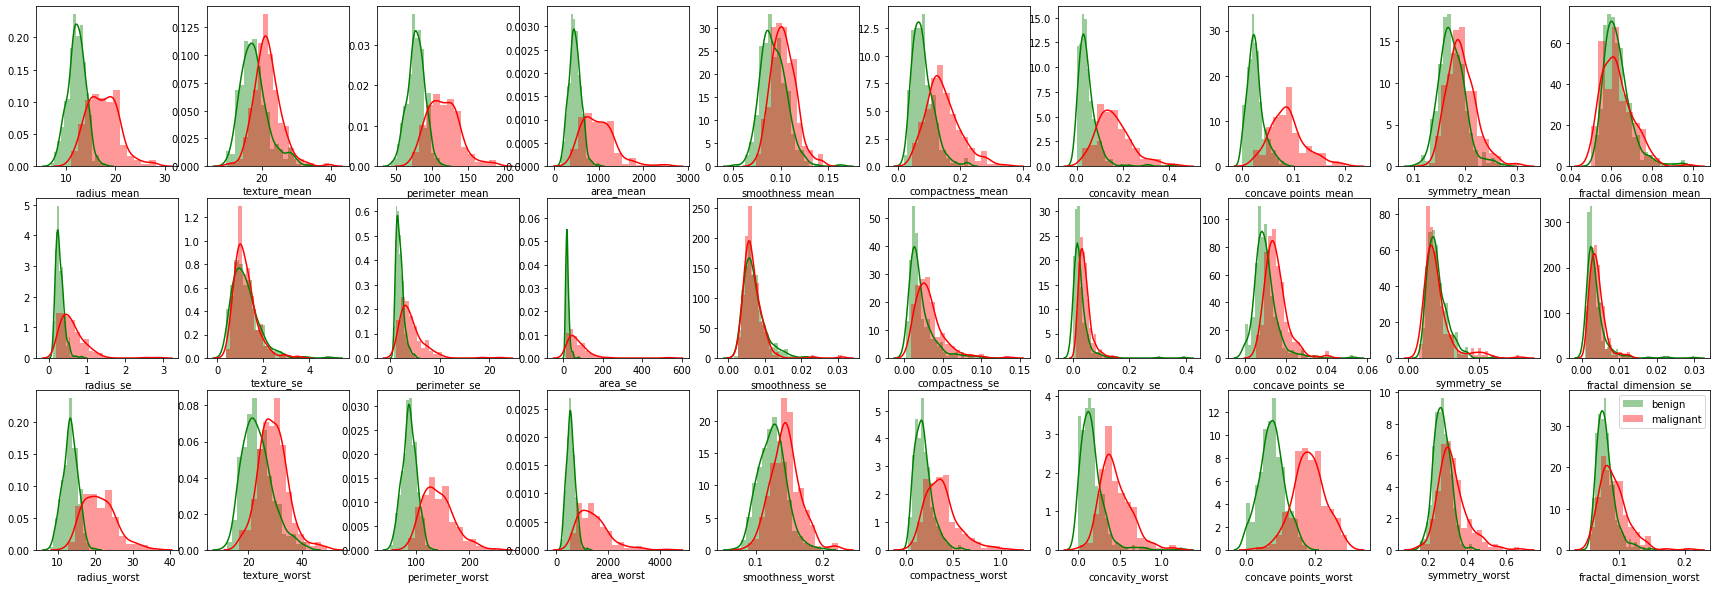

In [7]:
# Visualization of data

fig, axes = plt.subplots(ncols=10, nrows=3, figsize=(30,10))

for c, ax in zip(dataset.columns[2::], axes.flat):
    sns.distplot(dataset[dataset.diagnosis=='B'][c], ax=ax, color='g', label='benign')
    sns.distplot(dataset[dataset.diagnosis=='M'][c], ax=ax, color='r', label='malignant')
plt.legend()
plt.show()

In [8]:
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
dataset.drop(columns=['Unnamed: 32'], inplace=True)
dataset.diagnosis.replace({'B':0,'M':1}, inplace=True)

X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# #Fitting the Logistic Regression Algorithm to the Training Set
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, Y_train)
# #95.8 Acuracy

# #Fitting K-NN Algorithm
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, Y_train)
# #95.1 Acuracy

# #Fitting SVM
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, Y_train) 
# #97.2 Acuracy

# #Fitting K-SVM
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, Y_train)
# #96.5 Acuracy

# #Fitting Naive_Bayes
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, Y_train)
# #91.6 Acuracy

# #Fitting Decision Tree Algorithm
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, Y_train)
# #95.8 Acuracy

In [11]:
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
#98.6 Acuracy

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
# Train and Test Accuracy
print("Train Accuracy :: " + str(accuracy_score(Y_train, classifier.predict(X_train))))
print("Test Accuracy  :: " + str(accuracy_score(Y_test, Y_pred)))

Train Accuracy :: 0.9976525821596244
Test Accuracy  :: 0.986013986013986


In [13]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, class_names=['benign','malignant'], feature_names=dataset.iloc[:, 2:32].columns)
predict_fn = lambda x: classifier.predict_proba(x)

In [14]:
for i in [30,31,32]:
    exp = explainer.explain_instance(X_test[i], predict_fn, num_features=5)
    exp.show_in_notebook()

In [15]:
df = pd.DataFrame(X_test,columns=dataset.iloc[:, 2:32].columns)
df['diagnosis'] = Y_test
df.loc[30:32,:]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
30        12.81         13.06           81.29      508.8          0.08739   
31        20.57         17.77          132.90     1326.0          0.08474   
32        13.14         20.74           85.98      536.9          0.08675   

    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
30           0.03774        0.009193              0.01330         0.1466   
31           0.07864        0.086900              0.07017         0.1812   
32           0.10890        0.108500              0.03510         0.1562   

    fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
30                 0.06133  ...          16.15             86.7       570.7   
31                 0.05667  ...          23.41            158.8      1956.0   
32                 0.06020  ...          25.46            100.9       689.1   

    smoothness_worst  compactness_worst  concavity_worst  \
30            0.1162            0.05445          0.02758   
31            0.1238            0.18660          0.24160   
32            0.1351            0.35490          0.45040   

    concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
30                0.0399          0.1783                  0.07319          0  
31                0.1860          0.2750                  0.08902          1  
32                0.1181          0.2563                  0.08174          0  

[3 rows x 31 columns]